In [1]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

start=0
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

data = pd.read_csv("./220120走路/手25sec990cm26step.csv")
data = np.array(data)
length=[]
for i in range(len(data)):
    length.append(i)
# print(len(length))
Spectrum=[]
Spectrum_index=list(range(0, 100))
index=0

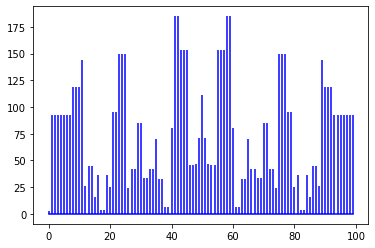

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


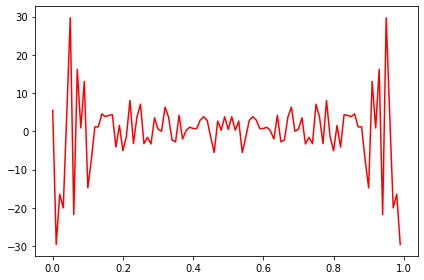

ValueError: invalid number of data points (0) specified

In [2]:
for i in range (0,2000,1000):
#     x=np.real(fft(data[start+(sr*i):start+((i+1)*sr),1]))
    x=np.real(fft(data[start+i:start+i+sr,1]))
    X = fft(x)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
    Spectrum.append(np.abs(X))
#     plt.xlabel('Freq (Hz)', fontsize = 40, labelpad = 20)
#     plt.ylabel('FFT Amplitude |X(freq)|', fontsize = 40, labelpad = 20)
    plt.show()
#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.plot(t, ifft(X), 'r')
#     plt.xlabel('Time (s)', fontsize = 40, labelpad = 20)
#     plt.ylabel('Amplitude', fontsize = 40, labelpad = 20)
    plt.tight_layout()
    plt.show()

In [3]:
print(Spectrum)

[array([  3. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. , 119. ,
       119. , 119. , 144. ,  26. ,  45. ,  45. ,  16. ,  36.5,   3.5,
         3.5,  36.5,  25.5,  95. ,  95. , 150. , 149.5, 149.5,  24. ,
        42. ,  42. ,  85.5,  85.5,  34. ,  34. ,  42. ,  42. ,  70.5,
        32.5,  32.5,   6.5,   6.5,  80.5, 185. , 185. , 153.5, 153.5,
       153.5,  46. ,  46. ,  46.5,  71. , 111. ,  71. ,  46.5,  46. ,
        46. , 153.5, 153.5, 153.5, 185. , 185. ,  80.5,   6.5,   6.5,
        32.5,  32.5,  70.5,  42. ,  42. ,  34. ,  34. ,  85.5,  85.5,
        42. ,  42. ,  24. , 149.5, 149.5, 150. ,  95. ,  95. ,  25.5,
        36.5,   3.5,   3.5,  36.5,  16. ,  45. ,  45. ,  26. , 144. ,
       119. , 119. , 119. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,
        93. ])]


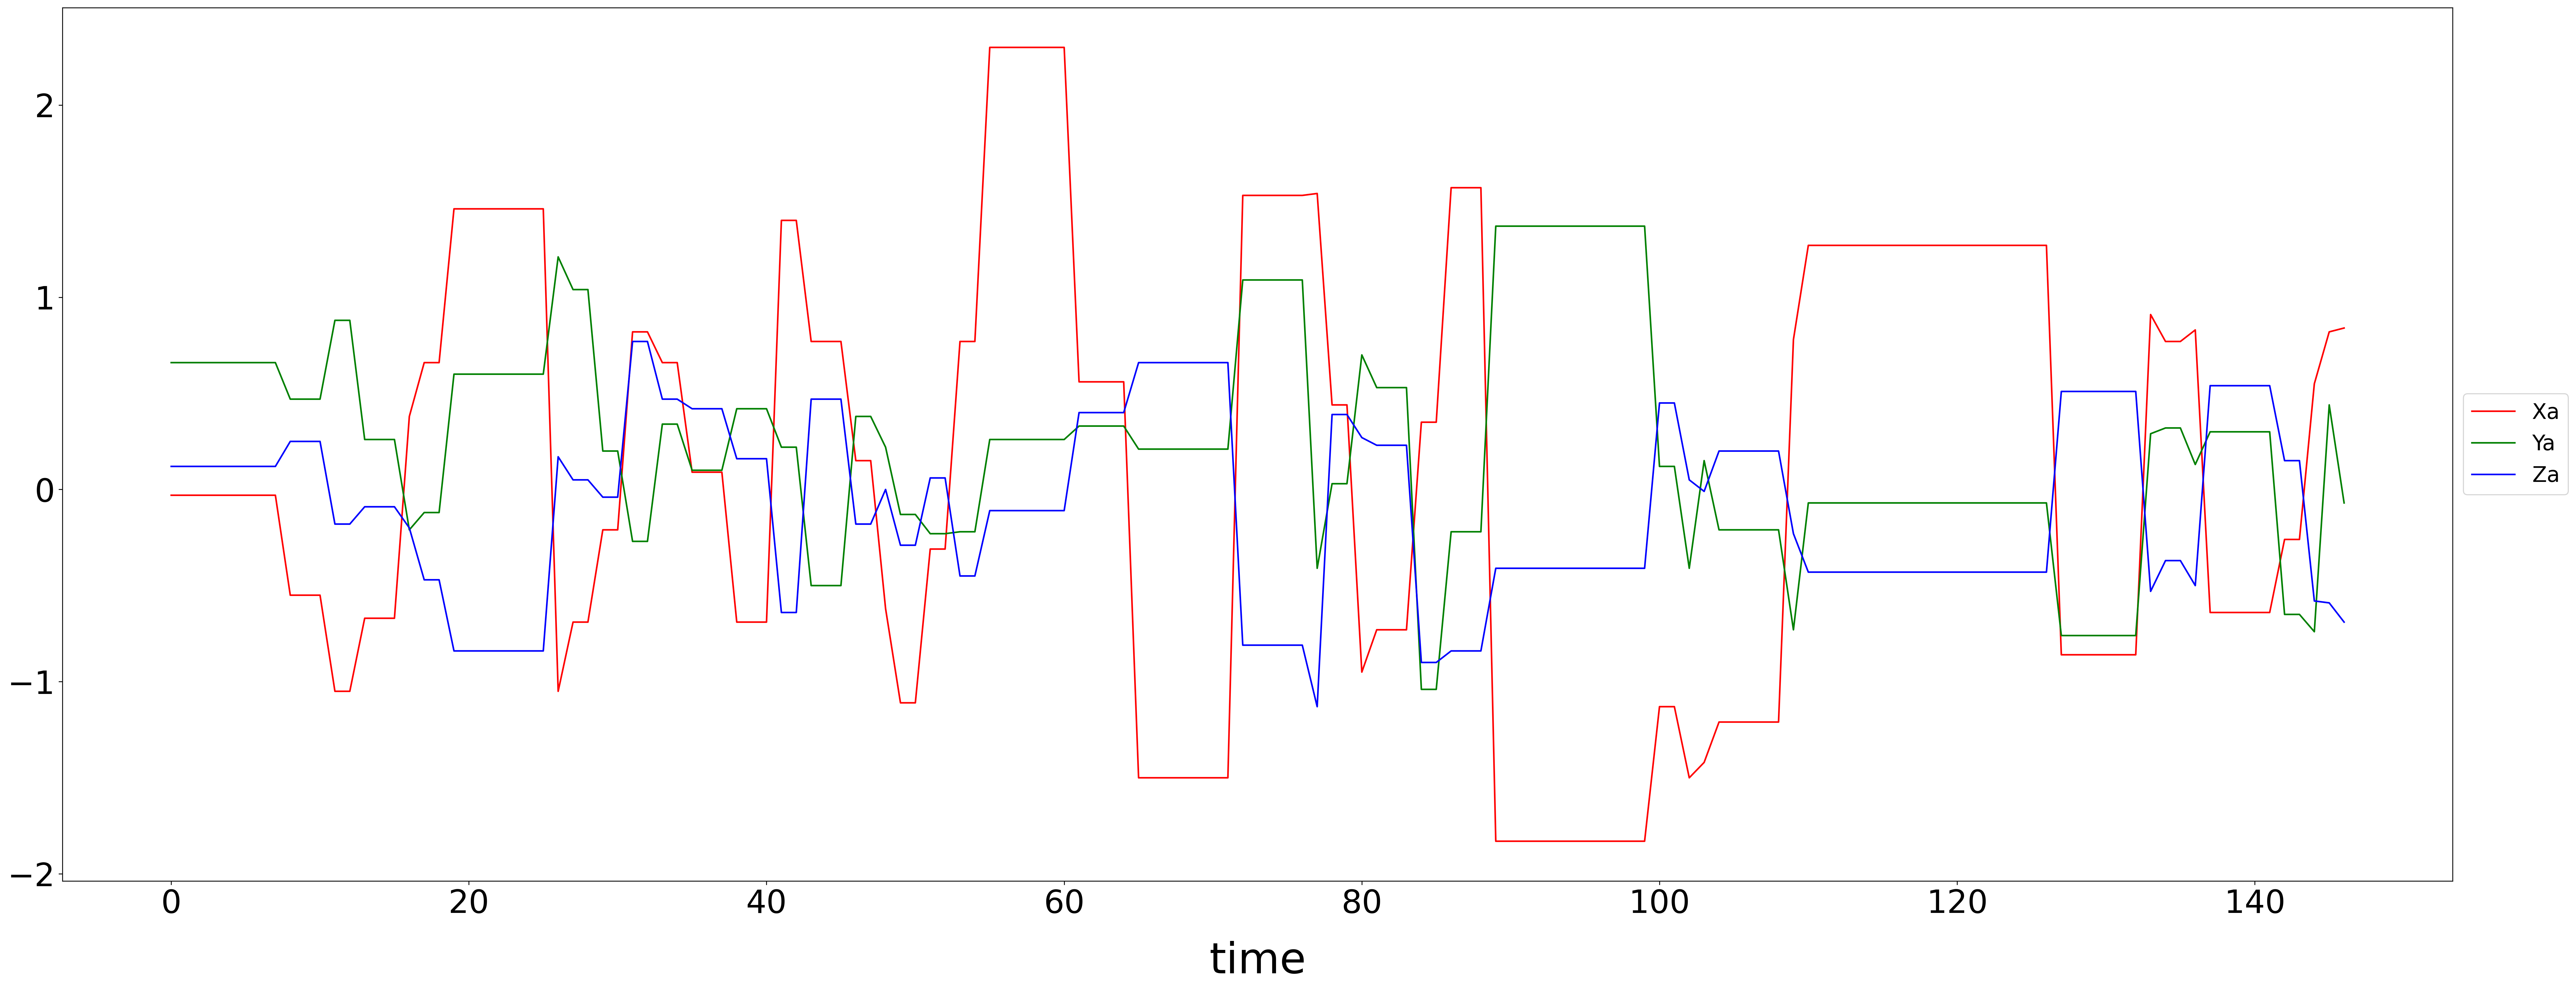

In [4]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, data[:,1], color = 'r', label = "Xa")
plt.plot(length, data[:,2], color = 'g', label = "Ya")
plt.plot(length, data[:,3], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

<ipython-input-5-462cf41a0458>:14: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=147).
  plt.specgram(data[:,1],Fs=1,cmap='plasma')


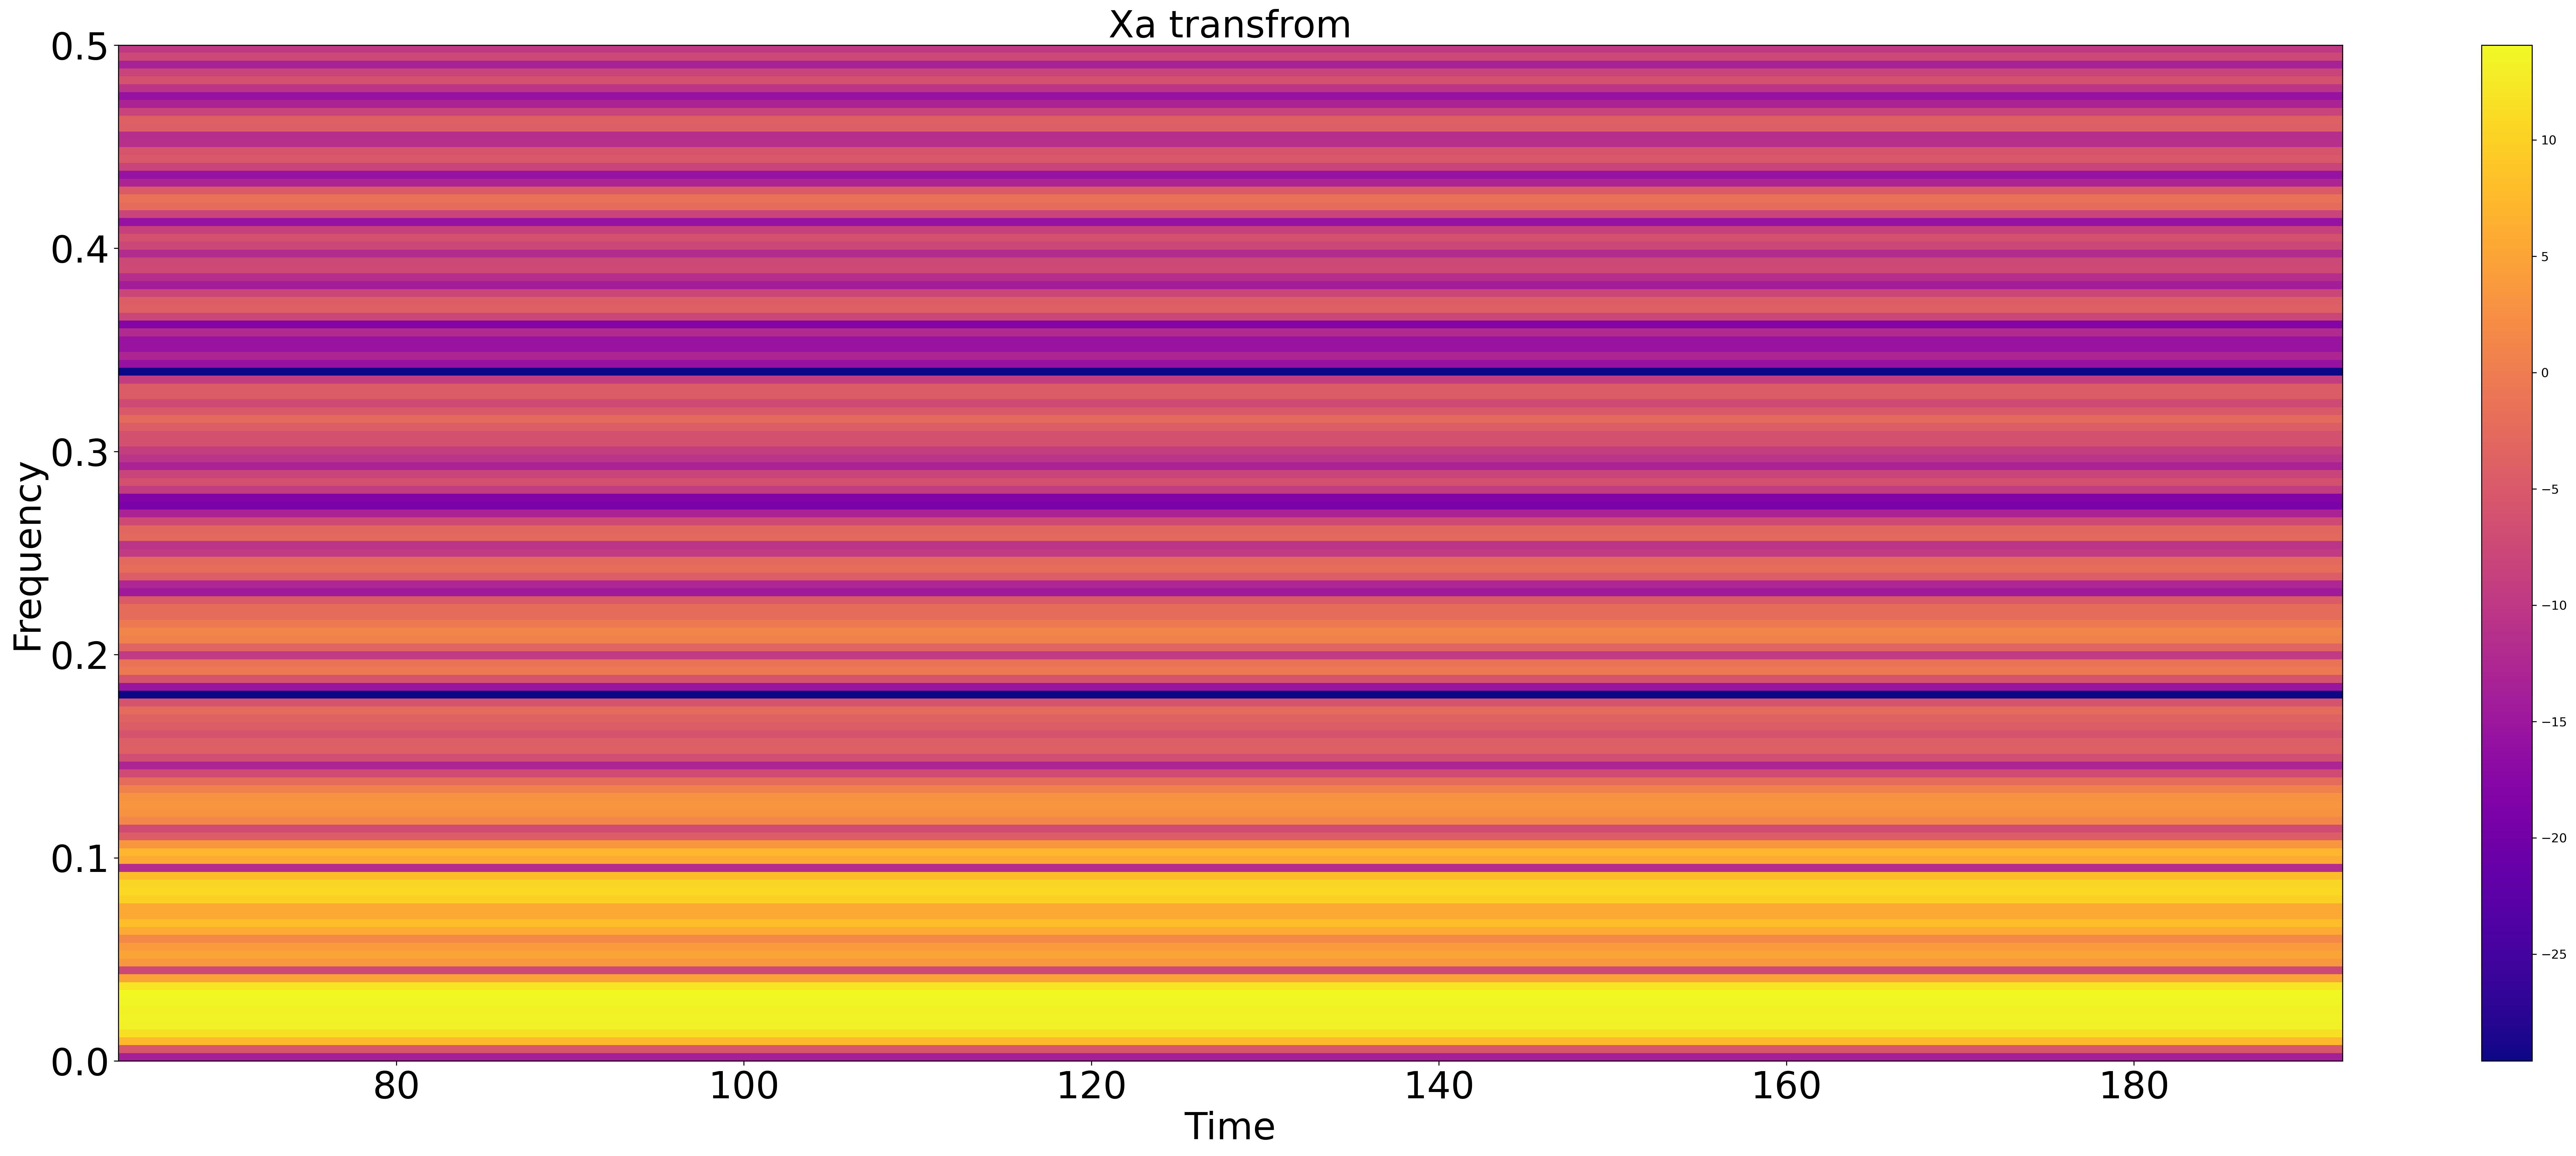

<ipython-input-5-462cf41a0458>:24: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=147).
  plt.specgram(data[:,2])


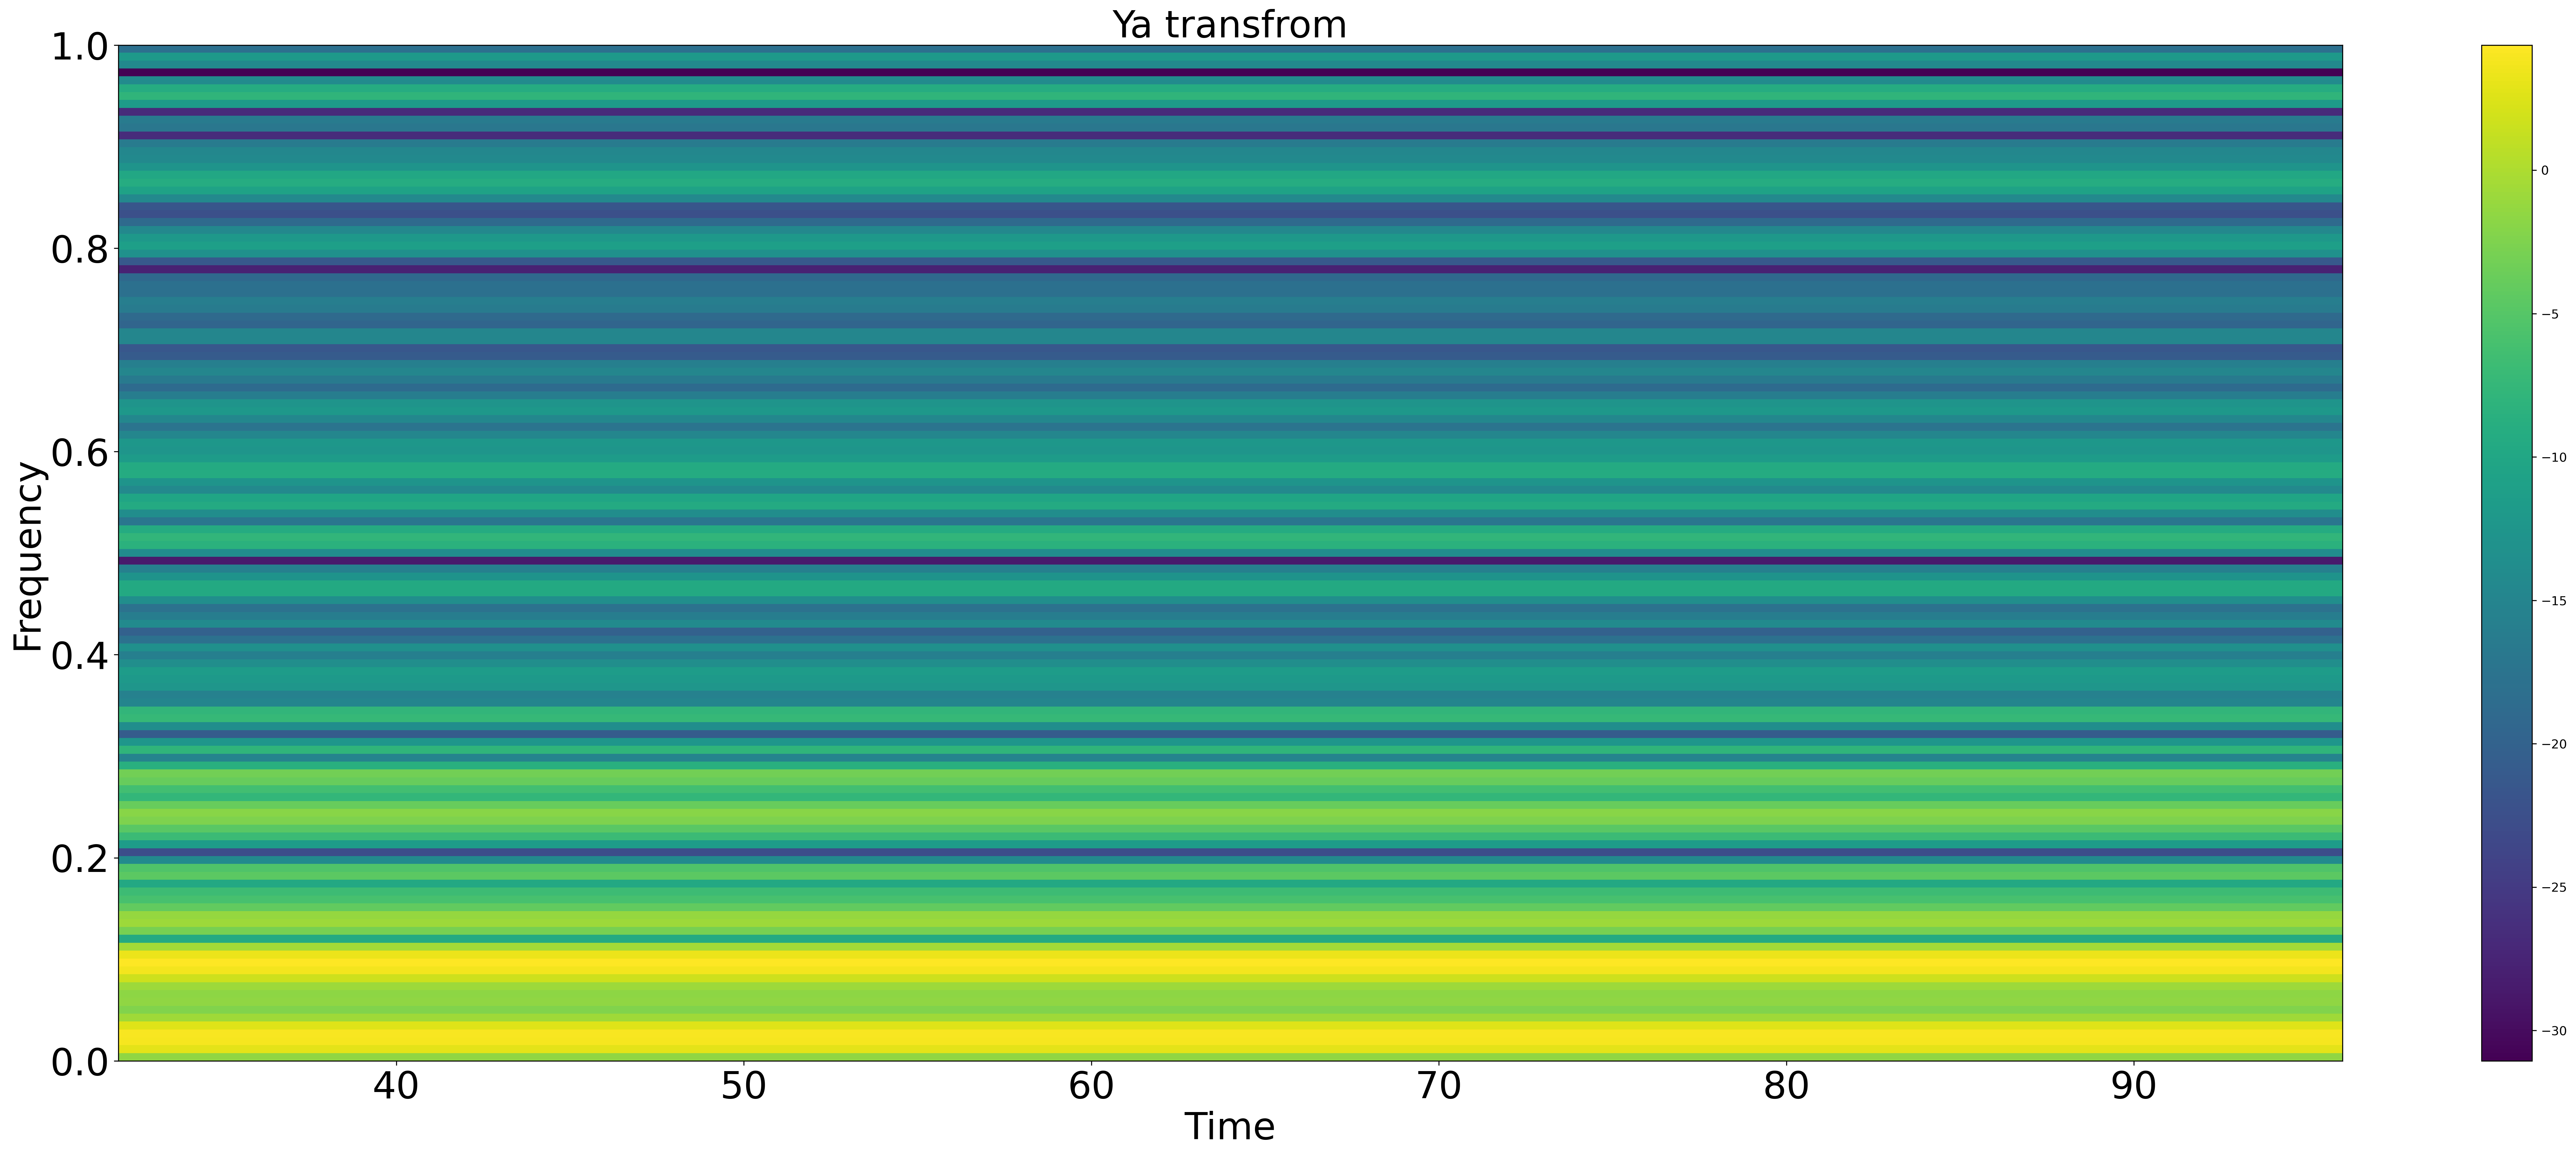

<ipython-input-5-462cf41a0458>:34: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=147).
  plt.specgram(data[:,3])


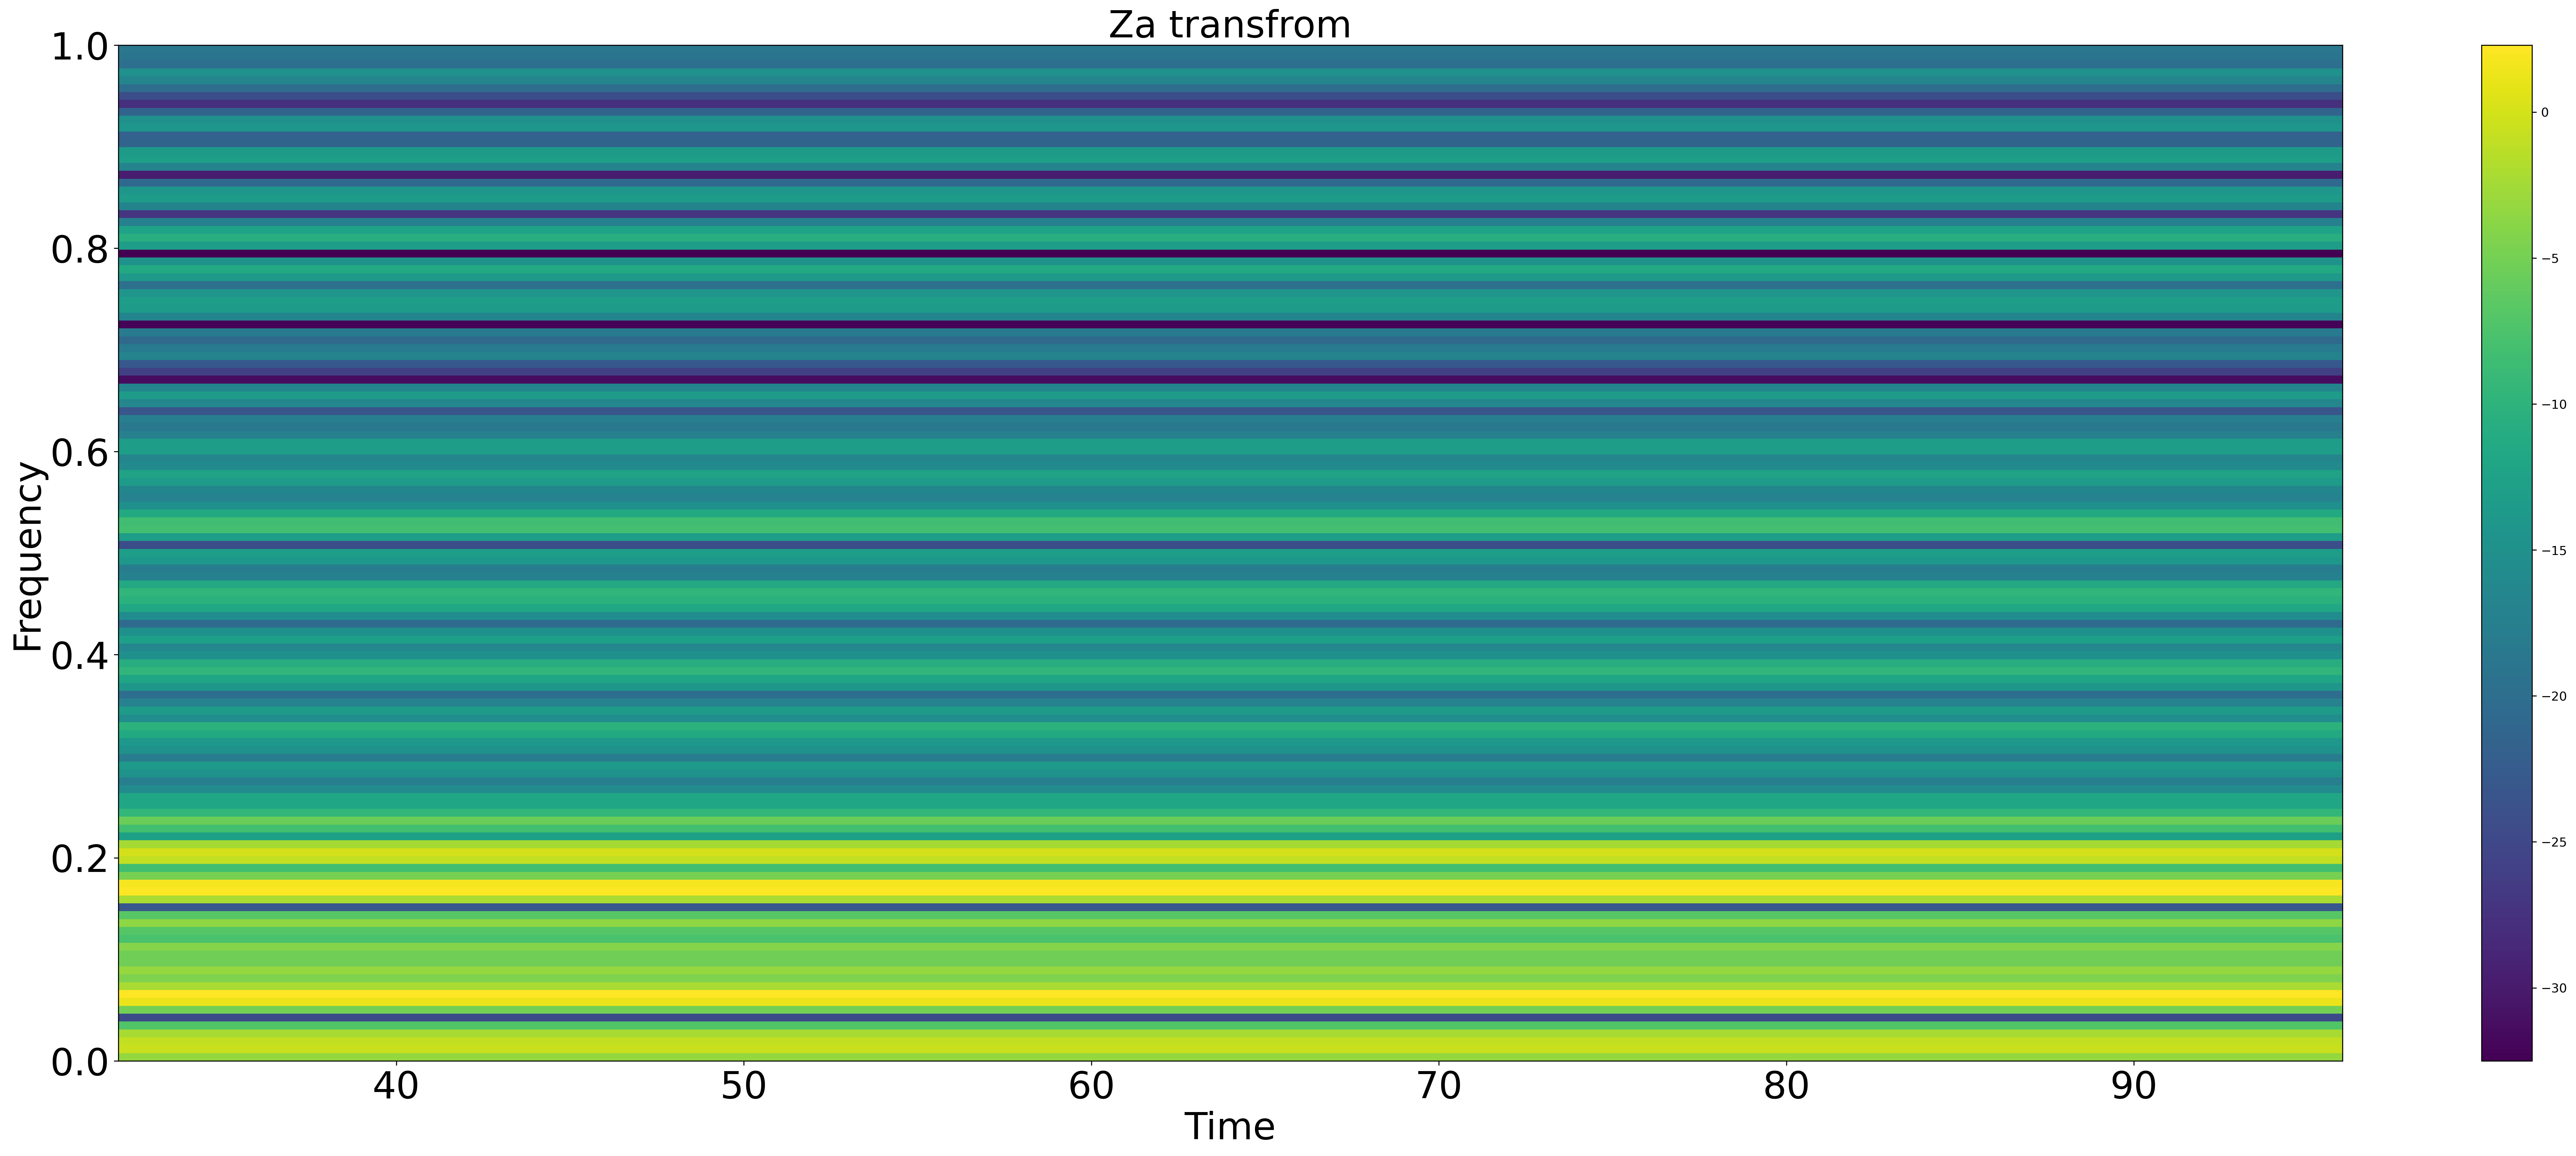

In [5]:
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(data[:,1],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(data[:,2])
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(data[:,3])
plt.colorbar()
plt.show()